# Computational Science

## Imports 

In [1]:
import pandas as pd #Import Pandas for Dataframes
import seaborn as sns #Import Seaborn for Graphs
import numpy as np #Import numpy for arrays
import math # Import Math for Sqrt,cos and Sin
import random # Import Random for Random Number Generation
import matplotlib.pyplot as plt #Plot Graphs
import pandas as pd
from sklearn import preprocessing
import numpy as np

# Part 1: Simulating the Robot in 2D Space

## Eulers Algorithm

In [2]:
def EulersEquation(U,x): # Eulers Equation  F = -2X+2U used to calulate the value of x in the full algorithm 
    f = -2*x +2*U #Performs the equation 
    return f # Returns the value
   

def IntergationCount (h,i): # Integration Count is used to calulate the difference between the Step size and the sample integral
    OGStep = h # Sets the Original Step size to the value of the step size (this changes later so needs to be constant)
    Count  = 0 # Set count varible to 0, This will be the difference
    S = False # set Start to False 
    if (i == 0):  # if the Sample Integral is not set set S to True
        S = True

    while S == False: # If the sample integral is set calculate the difference
        Count = Count + 1
        if (Count*OGStep == i): #verify if integral size is the correct amount then shut the gate
            S = True
            
    return Count #return the sample size

def Eulers(a,b,h,T,i): #Take in XInit,YInit, Step Size, Time and Sample Intergal
    df1 = pd.DataFrame({"T":[],"X":[],"U":[]}) #declare dataframe structure 
    t =a #Set Time at position 0, Can be higher based on inital Entry
    x= b  # Set x at position 0, Can be higher based on inital Entry
    Count = 0 #set count to 0 used in determing how many to print based on the sample size
    
    IntegrationCount = IntergationCount(h,i) #Calculate the sample size 
    
    while t<T: #while Current time < initial time
        if (t<0 or t<=5): #Set rotbot direction (U) based on where the time is
            U = 2
        elif (t<5 or t<=10):
            U = 1
        elif (t<10 or t<=15):
            U =3
    
        k = h*EulersEquation(U,x) #perform equation stated in the method Eulers Eqation
        x = x +k # add predition to the x value (Plotted later)
        t = t+h #increase step for next result
        Count = Count + 1 # increase count for integral
        
        if (Count >= IntegrationCount): # if the count is at the integral amount add to dataframe
            df2 = pd.DataFrame({"T":[t],"X":[x],"U":[U]}) #get result of eulers in dataframe based on integral steps
            df1 = df1.append(df2) #append to dataframe
            Count = 0 #reset the count to 0
            
    df1.reset_index(inplace=True) # reset the index broken by appending 2 dataframes
    df1 = df1.drop(columns=['index']) #drop the inital index column (Blank)
    return df1 # return dataframe 

def Actual(U,t): #The equation which plots the actual results for the time
    mathst = t*2 # time x2 
    eqat = U - math.exp(-mathst) #U - the exponential of t*2 
    return eqat # return the completed equation

def Actualplot(a,b,h,T): #Plot the actual values 
    dfActual = pd.DataFrame({"T":[],"XActual":[],"U":[]}) #Declare the dataframe
    t =a  # set current time to 0
    x= b #set x at position 0
    
    
    while t<=T: #while Current time < initial time
        if (t<0 or t<=5):#Set rotbot direction (U) based on where the time is
            U = 2
        elif (t<5 or t<=10):
            U = 1
        elif (t<10 or t<=15):
            U =3
    
        k = Actual(U,t) #Calulate the actual x position
        t = t+h #move the step value forward
        dfActual2 = pd.DataFrame({"T":[t],"XActual":[k],"U":[U]}) #fill the dataframe 
        
        dfActual = dfActual.append(dfActual2) #append the dataframe
            
    dfActual.reset_index(inplace=True) #fix the index values of dataframe
    dfActual = dfActual.drop(columns=['index'])
    return dfActual

## Perform Eulers 

In [40]:
print ("Enter xInitial") # Ask the user to input Initial X Value
xInit = float (input())
print ("Enter yInitial") # Ask the user to input Initial Y Value
yInit = float (input())
print ("Enter Step Size") # Ask the user to input Step Size
Step = float (input())
print ("Enter Time") # Ask the user to input Time Value
Time = float (input()) 
print ("Enter Sample Integral (To Print all put 0 )") # Ask the user to input Sample Value
Integration = float (input())

df1 = Eulers(xInit,yInit,Step,Time,Integration) # Perform the Eulers method on those parameters and return a pandas dataframe
df1

Enter xInitial
0
Enter yInitial
0
Enter Step Size
0.1
Enter Time
15
Enter Sample Integral (To Print all put 0 )
0


,T,X,U
0,0.1,0.400000,2.0
1,0.2,0.720000,2.0
2,0.3,0.976000,2.0
3,0.4,1.180800,2.0
4,0.5,1.344640,2.0
...,...,...,...
146,14.7,2.999930,3.0
147,14.8,2.999944,3.0
148,14.9,2.999955,3.0
149,15.0,2.999964,3.0


## Plot graphs

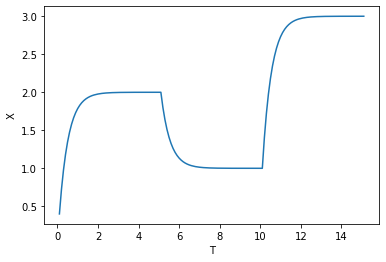

In [41]:
plt1 = sns.lineplot(x="T", y="X", data=df1) #Plots graph of the effects of X over time

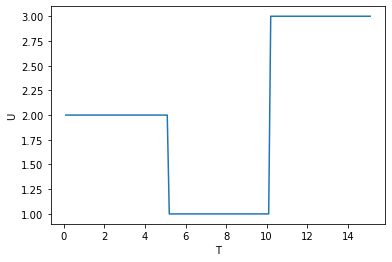

In [42]:
plt2 = sns.lineplot(x="T", y="U", data=df1) # Plots graph on the effect of U Over Time

## Multiplot for Report 

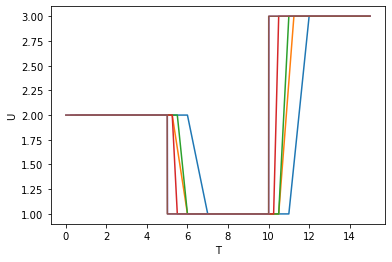

In [43]:
df2 = Eulers(0,0,1,15,0) # Perform the Eulers method on those parameters and return a pandas dataframe
df3 = Eulers(0,0,0.75,15,0) # Perform the Eulers method on those parameters and return a pandas dataframe
df4 = Eulers(0,0,0.5,15,0) # Perform the Eulers method on those parameters and return a pandas dataframe
df5 = Eulers(0,0,0.25,15,0) # Perform the Eulers method on those parameters and return a pandas dataframe
df6 = Eulers(0,0,0.01,15,0) # Perform the Eulers method on those parameters and return a pandas dataframe
df7 = Eulers(0,0,0.001,15,0) # Perform the Eulers method on those parameters and return a pandas dataframe
plt3 = sns.lineplot(x="T", y="U", data=df2) #blue 1
plt4 = sns.lineplot(x="T", y="U", data=df3) #Orange 0.75
plt5 = sns.lineplot(x="T", y="U", data=df4) #Green 0.5
plt6 = sns.lineplot(x="T", y="U", data=df5) #Red 0.25
plt7 = sns.lineplot(x="T", y="U", data=df6) #Purple 0.01
plt8 = sns.lineplot(x="T", y="U", data=df7) #Brown 0.001

(Returns as Pandas Dataframe)

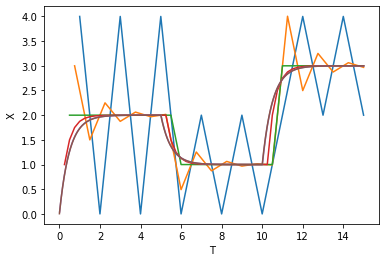

In [44]:
plt9 = sns.lineplot(x="T", y="X", data=df2) #Blue 1
plt10 = sns.lineplot(x="T", y="X", data=df3) #Orange 0.75
plt11 = sns.lineplot(x="T", y="X", data=df4) #Green 0.5
plt12 = sns.lineplot(x="T", y="X", data=df5) #Red 0.25
plt13 = sns.lineplot(x="T", y="X", data=df6) #Purple 0.01
plt14 = sns.lineplot(x="T", y="X", data=df7) #Brown 0.001

## Actual Plot

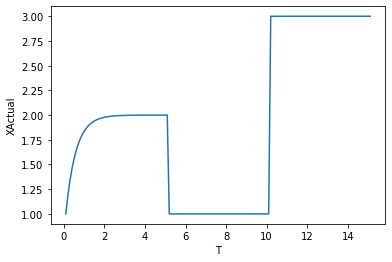

In [45]:
dfactual2 = Actualplot (0,0,0.1,15) #plot the actual value of Initialx: 0, InitialY:0, Step: 0.1, time:15
Actualplt = sns.lineplot(x="T", y="XActual", data=dfactual2)  #plot actual results

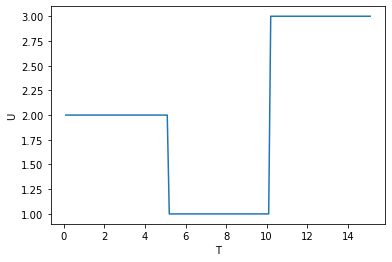

In [46]:
Actualplt = sns.lineplot(x="T", y="U", data=dfactual2)  #plot actual results

# Part 2: Adding Noise to Simulation

## Box Muller Algorithm

In [47]:
standarddev = 0.01 #Target Standard Deviation
meanx = 0 # Target Mean
noise = [] #Noise array
distz1 = [] # Array of distribution of random numbers without modification
distb = [] #Slight modification of random numbers
distz2 = [] #First Set of Random Numbers
distz3 = [] #Second Set of Random Numbers

for ind in df1.index: # For each record in the dataframe
        z1 = random.uniform(0,2*np.pi) # generate a random number between 0 and 2*pi
        distz1.append(z1) # append random numbers to z1 array
        
        #generate a random number between 0 and 1 uniformally generated
        b = standarddev*math.sqrt(-2*math.log(random.uniform(0,1))) 
        distb.append(b) # append unformly generated numbers to array
        
        # calulate the sin of the first random number using the uniform number
        z2 = b*math.sin(z1)+meanx 
        distz2 = [z2] #add random number 1 to array
        
        # calulate the cos of the Second random number using the uniform number
        z3 = b*math.cos(z1)+meanx
        distz3 = [z3] #add random number 2 to array
        
        Xnoise = z2 
        Xnoise2 = z3 

        noise.append(Xnoise)# Add random number 1 to Xnoise
        noise.append(Xnoise2)# Add random number 2 to Xnoise

In [48]:
def BoxMuller (dataframe):
    standarddev = 0.1 #Target Standard Deviation
    meanx = 0 # Target Mean
    noise = [] #Noise array
    distz1 = [] # Array of distribution of random numbers without modification
    distb = [] #Slight modification of random numbers
    distz2 = [] #First Set of Random Numbers
    distz3 = [] #Second Set of Random Numbers

    for ind in dataframe.index: # For each record in the dataframe
            z1 = random.uniform(0,2*np.pi) # generate a random number between 0 and 2*pi
            distz1.append(z1) # append random numbers to z1 array
        
            #generate a random number between 0 and 1 uniformally generated
            b = standarddev*math.sqrt(-2*math.log(random.uniform(0,1))) 
            distb.append(b) # append unformly generated numbers to array
        
            # calulate the sin of the first random number using the uniform number
            z2 = b*math.sin(z1)+meanx 
            distz2 = [z2] #add random number 1 to array
        
            # calulate the cos of the Second random number using the uniform number
            z3 = b*math.cos(z1)+meanx
            distz3 = [z3] #add random number 2 to array
        
            Xnoise = z2 
            Xnoise2 = z3 

            noise.append(Xnoise)# Add random number 1 to Xnoise
            noise.append(Xnoise2)# Add random number 2 to Xnoise
    return noise

## Distribution Plots of Random Numbers 

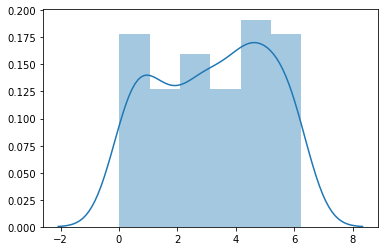

In [49]:
sns.distplot(distz1) #Distribution of random numbers before box muller

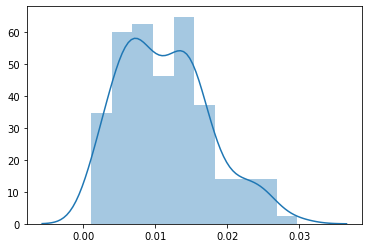

In [50]:
sns.distplot(distb) #Distribution of Random Uniform Numbers between 0 and 1

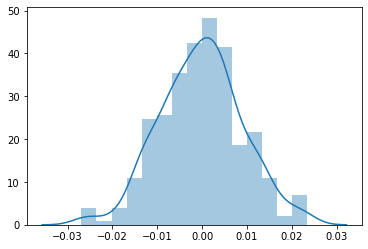

In [51]:
sns.distplot(noise) #Distribution of Standardised Numbers

## Add Noise to Dataframe

In [52]:
dfnoise = pd.DataFrame(noise) #Add noise to dataframe
dfnoise.columns =['Noise'] #Rename Col to Noise
dfcount = df1['X'].count() # Find count of x (how many in dataframe)
# add to dataframe the number of records in dataframe
dfnoiseshortened = dfnoise[dfnoise["Noise"].index < dfcount] 
df1['Noise'] = dfnoiseshortened # append noise to original dataframe
df1 #show dataframe

,T,X,U,Noise
0,0.1,0.400000,2.0,-0.003075
1,0.2,0.720000,2.0,0.000832
2,0.3,0.976000,2.0,-0.005630
3,0.4,1.180800,2.0,-0.026050
4,0.5,1.344640,2.0,-0.014493
...,...,...,...,...
146,14.7,2.999930,3.0,0.002525
147,14.8,2.999944,3.0,-0.003826
148,14.9,2.999955,3.0,0.002748
149,15.0,2.999964,3.0,-0.006174


In [53]:
XcombinedNoise =  df1['Noise'] + df1['X'] # Add Noise to the X value
df1['xNoise'] = XcombinedNoise # Add XNoise to dataframe
df1 #Display Dataframe

,T,X,U,Noise,xNoise
0,0.1,0.400000,2.0,-0.003075,0.396925
1,0.2,0.720000,2.0,0.000832,0.720832
2,0.3,0.976000,2.0,-0.005630,0.970370
3,0.4,1.180800,2.0,-0.026050,1.154750
4,0.5,1.344640,2.0,-0.014493,1.330147
...,...,...,...,...,...
146,14.7,2.999930,3.0,0.002525,3.002455
147,14.8,2.999944,3.0,-0.003826,2.996119
148,14.9,2.999955,3.0,0.002748,3.002703
149,15.0,2.999964,3.0,-0.006174,2.993791


## Calculate Average Percentage of Noise Generated 

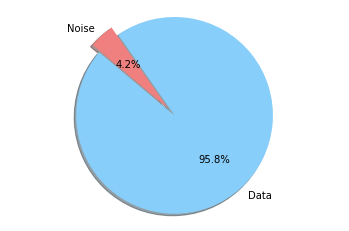

In [54]:
Noise = df1['Noise'] #fetch noise values
X = df1['X'] #Fetch x values 
perc =abs( (Noise/X *100)) # Calculate percentage x 
df1['PercentageNoise'] = perc #add percentage to dataframe
Noise2 = BoxMuller(df1)
Noise3 = BoxMuller(df1)
Noise4 = BoxMuller(df1)
Noise5 = BoxMuller(df1)
dfnoise2 = pd.DataFrame(Noise2)
dfnoise3 = pd.DataFrame(Noise3)
dfnoise4 = pd.DataFrame(Noise4)
dfnoise5 = pd.DataFrame(Noise5)
dfnoise2.columns =['Noise2']
dfnoise3.columns =['Noise3']
dfnoise4.columns =['Noise4']
dfnoise5.columns =['Noise5']
countave = df1['X'].count()
Shortened2 = dfnoise2[dfnoise2["Noise2"].index < countave]
Shortened3 = dfnoise3[dfnoise3["Noise3"].index < countave]
Shortened4 = dfnoise4[dfnoise4["Noise4"].index < countave]
Shortened5 = dfnoise5[dfnoise5["Noise5"].index < countave]
df1['Noise2'] = Shortened2
df1['Noise3'] = Shortened3
df1['Noise4'] = Shortened4
df1['Noise5'] = Shortened5
Xcomb2 =  df1['Noise2'] + df1['X']
Xcomb3 =  df1['Noise3'] + df1['X']
Xcomb4 =  df1['Noise4'] + df1['X']
Xcomb5 =  df1['Noise5'] + df1['X']
df1['xNoise2'] = Xcomb2 
df1['xNoise3'] = Xcomb3 
df1['xNoise4'] = Xcomb4 
df1['xNoise5'] = Xcomb5 
Noise2 = df1['Noise2'] #fetch noise values
Noise3 = df1['Noise3'] #fetch noise values
Noise4 = df1['Noise4'] #fetch noise values
Noise5 = df1['Noise5'] #fetch noise values
X = df1['X'] #Fetch x values 
X2 = df1['X'] #Fetch x values 
X3 = df1['X'] #Fetch x values 
X4 = df1['X'] #Fetch x values 

perc2 =abs( (Noise2/X *100)) # Calculate percentage x 
perc3 =abs( (Noise3/X2 *100)) # Calculate percentage x 
perc4 =abs( (Noise4/X3 *100)) # Calculate percentage x 
perc5 =abs( (Noise5/X4 *100)) # Calculate percentage x 
df1['PercentageNoise2'] = perc2 #add percentage to dataframe
df1['PercentageNoise3'] = perc3 #add percentage to dataframe
df1['PercentageNoise4'] = perc4 #add percentage to dataframe
df1['PercentageNoise5'] = perc5 #add percentage to dataframe

data1 = df1['PercentageNoise'].mean()
data2 = df1['PercentageNoise2'].mean()
data3 = df1['PercentageNoise3'].mean()
data4 = df1['PercentageNoise4'].mean()
data5 = df1['PercentageNoise5'].mean()

percentageave = data1 + data2 + data3 + data4 + data5
percentageave = percentageave /5
whole = 100 - percentageave

labels = 'Data', 'Noise' # set the titles for each section
sizes = [whole, percentageave]
colors = ['lightskyblue', 'lightcoral'] #set the colours 
explode = (0.1, 0)  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors, #plot the pie chart
autopct='%1.1f%%', shadow=True, startangle=140) #set the angles

plt.axis('equal')
plt.show() #show the pie chart

df1 = df1.drop(['Noise','Noise2', 'Noise3','Noise4','Noise5','xNoise2', 'xNoise3','xNoise4', 'xNoise5','PercentageNoise2', 'PercentageNoise3','PercentageNoise4', 'PercentageNoise5', 'PercentageNoise'], axis=1)


## Display affects on noise to X

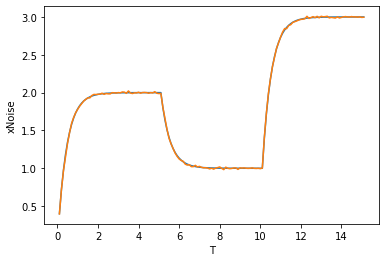

In [55]:
#Plot Effect Noise had on X (Increasing std to 0.1 makes the effect more evident)
Noiseplt = sns.lineplot(x="T", y="X", data=df1)
Noiseplt = sns.lineplot(x="T", y="xNoise", data=df1) 

### Add Noisex to all step size dataframes

In [56]:
noise2 = BoxMuller(df2) # Make Noise for Df2 (Step Size:1) 
dfnoise2 = pd.DataFrame(noise2) #Append Noise to dataframe
dfnoise2.columns =['Noise'] # Rename col to Noise
dfcount2 = df2['X'].count() #Get the count of X (number of entries)
dfnoiseshortened2 = dfnoise2[dfnoise2["Noise"].index < dfcount2] #Half the data to fit the full dataframe
df2['Noise'] = dfnoiseshortened2 # add noise to full dataframe
XcombinedNoise2 =  df2['Noise'] + df2['X'] # add noise to x
df2['xNoise'] = XcombinedNoise2  #add Xnoise to dataframe

noise3 = BoxMuller(df3) # Make Noise for Df3 (Step Size:0.75) 
dfnoise3 = pd.DataFrame(noise3) #Append Noise to dataframe
dfnoise3.columns =['Noise'] # Rename col to Noise
dfcount3 = df3['X'].count() #Get the count of X (number of entries)
dfnoiseshortened3 = dfnoise3[dfnoise3["Noise"].index < dfcount3]  #Half the data to fit the full dataframe
df3['Noise'] = dfnoiseshortened3 # add noise to full dataframe
XcombinedNoise3 =  df3['Noise'] + df3['X'] # add noise to x
df3['xNoise'] = XcombinedNoise3 #add Xnoise to dataframe

noise4 = BoxMuller(df4) # Make Noise for Df4 (Step Size:0.5) 
dfnoise4 = pd.DataFrame(noise4) #Append Noise to dataframe
dfnoise4.columns =['Noise'] # Rename col to Noise
dfcount4 = df4['X'].count() #Get the count of X (number of entries)
dfnoiseshortened4 = dfnoise4[dfnoise4["Noise"].index < dfcount4]  #Half the data to fit the full dataframe
df4['Noise'] = dfnoiseshortened4 # add noise to full dataframe
XcombinedNoise4 =  df4['Noise'] + df4['X'] # add noise to x
df4['xNoise'] = XcombinedNoise4 #add Xnoise to dataframe

noise5 = BoxMuller(df5) # Make Noise for Df5 (Step Size: 0.25) 
dfnoise5 = pd.DataFrame(noise5) #Append Noise to dataframe
dfnoise5.columns =['Noise'] # Rename col to Noise
dfcount5 = df5['X'].count() #Get the count of X (number of entries)
dfnoiseshortened5 = dfnoise5[dfnoise5["Noise"].index < dfcount5]  #Half the data to fit the full dataframe
df5['Noise'] = dfnoiseshortened5 # add noise to full dataframe
XcombinedNoise5 =  df5['Noise'] + df5['X'] # add noise to x
df5['xNoise'] = XcombinedNoise5 #add Xnoise to dataframe

noise6 = BoxMuller(df6) # Make Noise for Df6 (Step Size:0.01) 
dfnoise6 = pd.DataFrame(noise6) #Append Noise to dataframe
dfnoise6.columns =['Noise'] # Rename col to Noise
dfcount6 = df6['X'].count() #Get the count of X (number of entries)
dfnoiseshortened6 = dfnoise6[dfnoise6["Noise"].index < dfcount6] #Half the data to fit the full dataframe
df6['Noise'] = dfnoiseshortened6 # add noise to full dataframe
XcombinedNoise6 =  df6['Noise'] + df6['X'] # add noise to x
df6['xNoise'] = XcombinedNoise6 #add Xnoise to dataframe

noise7 = BoxMuller(df7) # Make Noise for Df7 (Step Size:0.001) 
dfnoise7 = pd.DataFrame(noise7) #Append Noise to dataframe
dfnoise7.columns =['Noise'] # Rename col to Noise
dfcount7 = df7['X'].count() #Get the count of X (number of entries)
dfnoiseshortened7 = dfnoise7[dfnoise7["Noise"].index < dfcount7] #Half the data to fit the full dataframe
df7['Noise'] = dfnoiseshortened7 # add noise to full dataframe
XcombinedNoise7 =  df7['Noise'] + df7['X'] # add noise to x
df7['xNoise'] = XcombinedNoise7 #add Xnoise to dataframe

In [57]:
arrayofdata = df1['xNoise'].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
arrayofdata2 = np.asarray(arrayofdata,dtype=np.float64)
arrayofdata2 = arrayofdata2.reshape(-1, 1)
x_scaled = min_max_scaler.fit_transform(arrayofdata2)
df1['Normalisedx'] = x_scaled

In [58]:
df1

,T,X,U,xNoise,Normalisedx
0,0.1,0.400000,2.0,0.396925,0.000000
1,0.2,0.720000,2.0,0.720832,0.123980
2,0.3,0.976000,2.0,0.970370,0.219494
3,0.4,1.180800,2.0,1.154750,0.290068
4,0.5,1.344640,2.0,1.330147,0.357204
...,...,...,...,...,...
146,14.7,2.999930,3.0,3.002455,0.997304
147,14.8,2.999944,3.0,2.996119,0.994879
148,14.9,2.999955,3.0,3.002703,0.997399
149,15.0,2.999964,3.0,2.993791,0.993988


# Part 3: Predicting the Robot

## Step Function Perceptron

In [59]:
def SelectedEpoch(Epochnum,PerceptonOutput): #Method to select and add to dataframe which epoch to plot
    totalvalues = df1['X'].count() #Get the count of the x values of the dataframe
    count = -1 # initialise count at -1 so you can start writing at 0
    latch = False # set latch to false
    ChosenEpoch = [] # declare chosen Epoch
    delete = Epochnum*totalvalues - totalvalues #Declare the startpoint of epoch
    delete2 = Epochnum*totalvalues #Declare finish point of epoch
    for x in PerceptonOutput: # loop around the data outputted by the perceptron
        count = count +1 # increase count
        if count == delete: # if count is at startpoint set latch to true so it can write
            latch = True 
        if count == delete2: # if count is at finishpoint set latch to False so it cant write
            latch = False 
        if latch == True: # if latch is true append the x value to the epoch array 
            ChosenEpoch.append(x) 
    return ChosenEpoch #return the data from that epoch

    
def train_weights_step(array, lr, Epochs2): #Method for step activation
    Weight = [-0.10,random.uniform(0,1),random.uniform(0,1),random.uniform(0,1)] # initialise 3 weights and 3 bias weights 
    for Epoch2 in range(Epochs2): #for each epoch
        sumerr = 0.0
        if (Epoch2 ==0  ):
            Output = [] #delcare the output array
            errorarr = []
            updated_weight = []
            count = 0 # Declare position 0 
            for x in array:# for each value in epoch array
                updated_weight.append([Weight[0],Weight[1],Weight[2],Weight[3]])
                prediction = predict(x,Weight) # complete prediction on result
                if count == 0: # change target for weight
                    Target = x[2]
                elif count==1: # change target for weight
                    Target = x[1]
                else: #change target for weight
                    Target = x[0]
                delta = Target - prediction #Calculate delta
                error = delta # set error to delta
                errorarr.append(error)
                Output.append(prediction) # append prediction 
                Weight_change_bias= -x[0]*lr*error # calculate new bias weight
                Weight[0] = Weight[0] + Weight_change_bias # change the bias weight
                Weight_change= -x[0]*lr*error # calculate weight change 
                for i in range(len(x)):  # for each item in the tuple update weigt
                    Weight[i + 1] = Weight[i +1] + Weight_change #update weight
                sumerr +=error**2
                count = count + 1 # increment count
            print('>epoch=%d, lrate=%.3f, error=%.3f' % (Epoch2, lr, sumerr))
        else: 
            countweight = 0
            for x in array:# for each value in epoch array            
                prediction = predict(x,updated_weight[countweight]) # complete prediction on result
                if count == 0: # change target for weight
                    Target = x[2]
                elif count==1: # change target for weight
                    Target = x[1]
                else: #change target for weight
                    Target = x[0]
                delta = Target - prediction #Calculate delta
                error = delta # set error to delta
                errorarr.append(error)
                Output.append(prediction) # append prediction 
                Weight_change_bias= -x[0]*lr*error # calculate new bias weight
                updated_weight[countweight][0] = updated_weight[countweight][0] + Weight_change_bias # change the bias weight
                Weight_change= -x[0]*lr*error # calculate weight change 
                for i in range(len(x)):  # for each item in the tuple update weigt
                    updated_weight[countweight][i+1] = updated_weight[countweight][i+1] + Weight_change #update weight
                countweight = countweight +1
                sumerr +=error**2
                count = count + 1 # increment count
            print('>epoch=%d, lrate=%.3f, error=%.3f' % (Epoch2, lr, sumerr))
    return Output #return data    
    

def predict(xn2, weightn2): #Declare the perceptron 
    activation = 0  #set the default activation to 0 
    activation = weightn2[0]
    for i in range(len(xn2)-1):
        activation = activation + weightn2[i+1]*xn2[i] #times the wight by x and add it to activation 
    return 1 if activation <= 0 else 0 # if the result of the activation is greater than or equal to0.5 return true else false

def Tuple_converter(array): #convert array into a tuple set 
    Tuplearray = [] #declare array for results
    count = 0 # set count to 0
    while count < len(array): #if count is less than the array length loop
        if count == 0: #if count is at 0 add 2 0s to the first entry
            Tuplearray.append([0,0,array[count]]) 
        elif count == 1: #if count is 1 add 1 0 to the second entry
            Tuplearray.append([0,array[count],array[count-1]])
        else: #else extablish a pattern where the first result is the last result in tuples
            Tuplearray.append([array[count],array[count-1],array[count-2]])
        count = count + 1 # increase count 
    return Tuplearray # return tuple 

>epoch=0, lrate=0.010, error=60.059
>epoch=1, lrate=0.010, error=60.291
>epoch=2, lrate=0.010, error=57.229
>epoch=3, lrate=0.010, error=54.628
>epoch=4, lrate=0.010, error=53.073
>epoch=5, lrate=0.010, error=52.692
>epoch=6, lrate=0.010, error=49.554
>epoch=7, lrate=0.010, error=49.663
>epoch=8, lrate=0.010, error=49.121
>epoch=9, lrate=0.010, error=48.168
>epoch=10, lrate=0.010, error=45.568
>epoch=11, lrate=0.010, error=46.163
>epoch=12, lrate=0.010, error=45.642
>epoch=13, lrate=0.010, error=45.660
>epoch=14, lrate=0.010, error=43.739
>epoch=15, lrate=0.010, error=44.179
>epoch=16, lrate=0.010, error=41.747
>epoch=17, lrate=0.010, error=42.120
>epoch=18, lrate=0.010, error=42.826
>epoch=19, lrate=0.010, error=40.144
>epoch=20, lrate=0.010, error=39.379
>epoch=21, lrate=0.010, error=40.397
>epoch=22, lrate=0.010, error=37.946
>epoch=23, lrate=0.010, error=34.967
>epoch=24, lrate=0.010, error=36.085
>epoch=25, lrate=0.010, error=35.687
>epoch=26, lrate=0.010, error=34.830
>epoch=27, 

>epoch=252, lrate=0.010, error=24.797
>epoch=253, lrate=0.010, error=24.901
>epoch=254, lrate=0.010, error=25.113
>epoch=255, lrate=0.010, error=26.225
>epoch=256, lrate=0.010, error=23.454
>epoch=257, lrate=0.010, error=26.654
>epoch=258, lrate=0.010, error=24.726
>epoch=259, lrate=0.010, error=24.959
>epoch=260, lrate=0.010, error=24.888
>epoch=261, lrate=0.010, error=25.471
>epoch=262, lrate=0.010, error=23.753
>epoch=263, lrate=0.010, error=25.554
>epoch=264, lrate=0.010, error=24.938
>epoch=265, lrate=0.010, error=24.238
>epoch=266, lrate=0.010, error=24.533
>epoch=267, lrate=0.010, error=27.713
>epoch=268, lrate=0.010, error=25.541
>epoch=269, lrate=0.010, error=24.137
>epoch=270, lrate=0.010, error=27.435
>epoch=271, lrate=0.010, error=25.460
>epoch=272, lrate=0.010, error=25.818
>epoch=273, lrate=0.010, error=25.691
>epoch=274, lrate=0.010, error=27.004
>epoch=275, lrate=0.010, error=25.480
>epoch=276, lrate=0.010, error=23.292
>epoch=277, lrate=0.010, error=24.456
>epoch=278, 

>epoch=474, lrate=0.010, error=24.581
>epoch=475, lrate=0.010, error=21.201
>epoch=476, lrate=0.010, error=30.682
>epoch=477, lrate=0.010, error=25.047
>epoch=478, lrate=0.010, error=23.000
>epoch=479, lrate=0.010, error=24.094
>epoch=480, lrate=0.010, error=26.200
>epoch=481, lrate=0.010, error=24.582
>epoch=482, lrate=0.010, error=25.764
>epoch=483, lrate=0.010, error=24.004
>epoch=484, lrate=0.010, error=26.585
>epoch=485, lrate=0.010, error=26.173
>epoch=486, lrate=0.010, error=25.275
>epoch=487, lrate=0.010, error=25.496
>epoch=488, lrate=0.010, error=25.328
>epoch=489, lrate=0.010, error=27.079
>epoch=490, lrate=0.010, error=25.580
>epoch=491, lrate=0.010, error=23.455
>epoch=492, lrate=0.010, error=25.010
>epoch=493, lrate=0.010, error=24.494
>epoch=494, lrate=0.010, error=27.067
>epoch=495, lrate=0.010, error=24.314
>epoch=496, lrate=0.010, error=22.594
>epoch=497, lrate=0.010, error=27.233
>epoch=498, lrate=0.010, error=28.204
>epoch=499, lrate=0.010, error=23.274
>epoch=500, 

>epoch=709, lrate=0.010, error=30.135
>epoch=710, lrate=0.010, error=24.652
>epoch=711, lrate=0.010, error=20.609
>epoch=712, lrate=0.010, error=24.529
>epoch=713, lrate=0.010, error=30.375
>epoch=714, lrate=0.010, error=26.929
>epoch=715, lrate=0.010, error=23.830
>epoch=716, lrate=0.010, error=22.126
>epoch=717, lrate=0.010, error=28.007
>epoch=718, lrate=0.010, error=27.175
>epoch=719, lrate=0.010, error=24.507
>epoch=720, lrate=0.010, error=21.706
>epoch=721, lrate=0.010, error=27.881
>epoch=722, lrate=0.010, error=27.815
>epoch=723, lrate=0.010, error=24.863
>epoch=724, lrate=0.010, error=21.166
>epoch=725, lrate=0.010, error=24.223
>epoch=726, lrate=0.010, error=29.571
>epoch=727, lrate=0.010, error=26.113
>epoch=728, lrate=0.010, error=20.873
>epoch=729, lrate=0.010, error=26.107
>epoch=730, lrate=0.010, error=25.942
>epoch=731, lrate=0.010, error=25.857
>epoch=732, lrate=0.010, error=25.481
>epoch=733, lrate=0.010, error=20.407
>epoch=734, lrate=0.010, error=25.777
>epoch=735, 

>epoch=1177, lrate=0.010, error=26.455
>epoch=1178, lrate=0.010, error=22.082
>epoch=1179, lrate=0.010, error=26.694
>epoch=1180, lrate=0.010, error=24.415
>epoch=1181, lrate=0.010, error=25.939
>epoch=1182, lrate=0.010, error=25.063
>epoch=1183, lrate=0.010, error=25.263
>epoch=1184, lrate=0.010, error=23.908
>epoch=1185, lrate=0.010, error=28.984
>epoch=1186, lrate=0.010, error=22.737
>epoch=1187, lrate=0.010, error=27.432
>epoch=1188, lrate=0.010, error=23.583
>epoch=1189, lrate=0.010, error=26.892
>epoch=1190, lrate=0.010, error=24.574
>epoch=1191, lrate=0.010, error=24.134
>epoch=1192, lrate=0.010, error=27.706
>epoch=1193, lrate=0.010, error=24.913
>epoch=1194, lrate=0.010, error=24.763
>epoch=1195, lrate=0.010, error=24.825
>epoch=1196, lrate=0.010, error=24.813
>epoch=1197, lrate=0.010, error=25.365
>epoch=1198, lrate=0.010, error=24.042
>epoch=1199, lrate=0.010, error=25.330
>epoch=1200, lrate=0.010, error=25.713
>epoch=1201, lrate=0.010, error=24.536
>epoch=1202, lrate=0.010,

>epoch=1643, lrate=0.010, error=29.093
>epoch=1644, lrate=0.010, error=24.160
>epoch=1645, lrate=0.010, error=26.637
>epoch=1646, lrate=0.010, error=26.430
>epoch=1647, lrate=0.010, error=18.137
>epoch=1648, lrate=0.010, error=28.932
>epoch=1649, lrate=0.010, error=29.445
>epoch=1650, lrate=0.010, error=24.172
>epoch=1651, lrate=0.010, error=22.622
>epoch=1652, lrate=0.010, error=26.659
>epoch=1653, lrate=0.010, error=26.079
>epoch=1654, lrate=0.010, error=25.203
>epoch=1655, lrate=0.010, error=21.643
>epoch=1656, lrate=0.010, error=27.421
>epoch=1657, lrate=0.010, error=25.627
>epoch=1658, lrate=0.010, error=26.455
>epoch=1659, lrate=0.010, error=24.805
>epoch=1660, lrate=0.010, error=21.021
>epoch=1661, lrate=0.010, error=27.357
>epoch=1662, lrate=0.010, error=26.219
>epoch=1663, lrate=0.010, error=25.508
>epoch=1664, lrate=0.010, error=24.763
>epoch=1665, lrate=0.010, error=25.861
>epoch=1666, lrate=0.010, error=26.217
>epoch=1667, lrate=0.010, error=27.076
>epoch=1668, lrate=0.010,

>epoch=2050, lrate=0.010, error=30.292
>epoch=2051, lrate=0.010, error=23.671
>epoch=2052, lrate=0.010, error=26.840
>epoch=2053, lrate=0.010, error=22.779
>epoch=2054, lrate=0.010, error=26.148
>epoch=2055, lrate=0.010, error=25.875
>epoch=2056, lrate=0.010, error=24.014
>epoch=2057, lrate=0.010, error=23.035
>epoch=2058, lrate=0.010, error=27.356
>epoch=2059, lrate=0.010, error=23.603
>epoch=2060, lrate=0.010, error=28.045
>epoch=2061, lrate=0.010, error=22.070
>epoch=2062, lrate=0.010, error=25.692
>epoch=2063, lrate=0.010, error=26.784
>epoch=2064, lrate=0.010, error=23.151
>epoch=2065, lrate=0.010, error=26.349
>epoch=2066, lrate=0.010, error=25.098
>epoch=2067, lrate=0.010, error=28.215
>epoch=2068, lrate=0.010, error=26.121
>epoch=2069, lrate=0.010, error=23.481
>epoch=2070, lrate=0.010, error=23.317
>epoch=2071, lrate=0.010, error=28.375
>epoch=2072, lrate=0.010, error=23.482
>epoch=2073, lrate=0.010, error=27.673
>epoch=2074, lrate=0.010, error=22.558
>epoch=2075, lrate=0.010,

>epoch=2424, lrate=0.010, error=22.083
>epoch=2425, lrate=0.010, error=23.327
>epoch=2426, lrate=0.010, error=29.270
>epoch=2427, lrate=0.010, error=27.254
>epoch=2428, lrate=0.010, error=22.247
>epoch=2429, lrate=0.010, error=23.926
>epoch=2430, lrate=0.010, error=27.536
>epoch=2431, lrate=0.010, error=28.532
>epoch=2432, lrate=0.010, error=21.568
>epoch=2433, lrate=0.010, error=23.725
>epoch=2434, lrate=0.010, error=25.126
>epoch=2435, lrate=0.010, error=28.401
>epoch=2436, lrate=0.010, error=24.721
>epoch=2437, lrate=0.010, error=21.224
>epoch=2438, lrate=0.010, error=27.066
>epoch=2439, lrate=0.010, error=27.216
>epoch=2440, lrate=0.010, error=24.149
>epoch=2441, lrate=0.010, error=23.579
>epoch=2442, lrate=0.010, error=24.216
>epoch=2443, lrate=0.010, error=26.982
>epoch=2444, lrate=0.010, error=26.852
>epoch=2445, lrate=0.010, error=25.079
>epoch=2446, lrate=0.010, error=23.974
>epoch=2447, lrate=0.010, error=23.629
>epoch=2448, lrate=0.010, error=27.759
>epoch=2449, lrate=0.010,

>epoch=2762, lrate=0.010, error=24.082
>epoch=2763, lrate=0.010, error=27.560
>epoch=2764, lrate=0.010, error=23.404
>epoch=2765, lrate=0.010, error=26.837
>epoch=2766, lrate=0.010, error=23.618
>epoch=2767, lrate=0.010, error=25.468
>epoch=2768, lrate=0.010, error=22.915
>epoch=2769, lrate=0.010, error=28.130
>epoch=2770, lrate=0.010, error=23.909
>epoch=2771, lrate=0.010, error=25.500
>epoch=2772, lrate=0.010, error=26.068
>epoch=2773, lrate=0.010, error=25.563
>epoch=2774, lrate=0.010, error=25.683
>epoch=2775, lrate=0.010, error=24.614
>epoch=2776, lrate=0.010, error=24.853
>epoch=2777, lrate=0.010, error=23.868
>epoch=2778, lrate=0.010, error=29.713
>epoch=2779, lrate=0.010, error=22.795
>epoch=2780, lrate=0.010, error=26.506
>epoch=2781, lrate=0.010, error=23.633
>epoch=2782, lrate=0.010, error=25.604
>epoch=2783, lrate=0.010, error=25.665
>epoch=2784, lrate=0.010, error=24.116
>epoch=2785, lrate=0.010, error=24.831
>epoch=2786, lrate=0.010, error=24.569
>epoch=2787, lrate=0.010,

>epoch=3271, lrate=0.010, error=20.400
>epoch=3272, lrate=0.010, error=26.513
>epoch=3273, lrate=0.010, error=25.155
>epoch=3274, lrate=0.010, error=28.275
>epoch=3275, lrate=0.010, error=22.502
>epoch=3276, lrate=0.010, error=23.359
>epoch=3277, lrate=0.010, error=28.147
>epoch=3278, lrate=0.010, error=25.338
>epoch=3279, lrate=0.010, error=26.250
>epoch=3280, lrate=0.010, error=23.689
>epoch=3281, lrate=0.010, error=22.308
>epoch=3282, lrate=0.010, error=26.233
>epoch=3283, lrate=0.010, error=26.677
>epoch=3284, lrate=0.010, error=22.284
>epoch=3285, lrate=0.010, error=28.146
>epoch=3286, lrate=0.010, error=26.054
>epoch=3287, lrate=0.010, error=27.310
>epoch=3288, lrate=0.010, error=22.910
>epoch=3289, lrate=0.010, error=24.461
>epoch=3290, lrate=0.010, error=24.165
>epoch=3291, lrate=0.010, error=27.733
>epoch=3292, lrate=0.010, error=27.241
>epoch=3293, lrate=0.010, error=25.917
>epoch=3294, lrate=0.010, error=20.880
>epoch=3295, lrate=0.010, error=28.424
>epoch=3296, lrate=0.010,

>epoch=3518, lrate=0.010, error=25.719
>epoch=3519, lrate=0.010, error=25.071
>epoch=3520, lrate=0.010, error=22.885
>epoch=3521, lrate=0.010, error=27.600
>epoch=3522, lrate=0.010, error=24.340
>epoch=3523, lrate=0.010, error=23.118
>epoch=3524, lrate=0.010, error=24.738
>epoch=3525, lrate=0.010, error=30.477
>epoch=3526, lrate=0.010, error=24.228
>epoch=3527, lrate=0.010, error=24.880
>epoch=3528, lrate=0.010, error=27.472
>epoch=3529, lrate=0.010, error=25.045
>epoch=3530, lrate=0.010, error=26.854
>epoch=3531, lrate=0.010, error=25.701
>epoch=3532, lrate=0.010, error=23.836
>epoch=3533, lrate=0.010, error=25.503
>epoch=3534, lrate=0.010, error=26.289
>epoch=3535, lrate=0.010, error=26.084
>epoch=3536, lrate=0.010, error=23.228
>epoch=3537, lrate=0.010, error=22.860
>epoch=3538, lrate=0.010, error=28.312
>epoch=3539, lrate=0.010, error=27.081
>epoch=3540, lrate=0.010, error=20.549
>epoch=3541, lrate=0.010, error=26.012
>epoch=3542, lrate=0.010, error=25.920
>epoch=3543, lrate=0.010,

>epoch=3809, lrate=0.010, error=28.752
>epoch=3810, lrate=0.010, error=23.427
>epoch=3811, lrate=0.010, error=25.177
>epoch=3812, lrate=0.010, error=24.120
>epoch=3813, lrate=0.010, error=26.247
>epoch=3814, lrate=0.010, error=23.415
>epoch=3815, lrate=0.010, error=26.487
>epoch=3816, lrate=0.010, error=22.624
>epoch=3817, lrate=0.010, error=29.143
>epoch=3818, lrate=0.010, error=22.796
>epoch=3819, lrate=0.010, error=23.510
>epoch=3820, lrate=0.010, error=28.110
>epoch=3821, lrate=0.010, error=23.161
>epoch=3822, lrate=0.010, error=26.583
>epoch=3823, lrate=0.010, error=22.816
>epoch=3824, lrate=0.010, error=25.614
>epoch=3825, lrate=0.010, error=23.840
>epoch=3826, lrate=0.010, error=23.571
>epoch=3827, lrate=0.010, error=29.368
>epoch=3828, lrate=0.010, error=25.334
>epoch=3829, lrate=0.010, error=22.791
>epoch=3830, lrate=0.010, error=26.912
>epoch=3831, lrate=0.010, error=25.745
>epoch=3832, lrate=0.010, error=24.240
>epoch=3833, lrate=0.010, error=26.254
>epoch=3834, lrate=0.010,

>epoch=4167, lrate=0.010, error=25.987
>epoch=4168, lrate=0.010, error=24.212
>epoch=4169, lrate=0.010, error=26.037
>epoch=4170, lrate=0.010, error=24.191
>epoch=4171, lrate=0.010, error=28.490
>epoch=4172, lrate=0.010, error=23.599
>epoch=4173, lrate=0.010, error=23.095
>epoch=4174, lrate=0.010, error=28.120
>epoch=4175, lrate=0.010, error=24.630
>epoch=4176, lrate=0.010, error=25.070
>epoch=4177, lrate=0.010, error=22.523
>epoch=4178, lrate=0.010, error=26.735
>epoch=4179, lrate=0.010, error=25.340
>epoch=4180, lrate=0.010, error=28.508
>epoch=4181, lrate=0.010, error=24.633
>epoch=4182, lrate=0.010, error=24.066
>epoch=4183, lrate=0.010, error=25.166
>epoch=4184, lrate=0.010, error=30.509
>epoch=4185, lrate=0.010, error=23.026
>epoch=4186, lrate=0.010, error=23.271
>epoch=4187, lrate=0.010, error=27.585
>epoch=4188, lrate=0.010, error=22.939
>epoch=4189, lrate=0.010, error=25.172
>epoch=4190, lrate=0.010, error=23.413
>epoch=4191, lrate=0.010, error=24.798
>epoch=4192, lrate=0.010,

>epoch=4431, lrate=0.010, error=26.442
>epoch=4432, lrate=0.010, error=24.007
>epoch=4433, lrate=0.010, error=22.341
>epoch=4434, lrate=0.010, error=29.852
>epoch=4435, lrate=0.010, error=25.193
>epoch=4436, lrate=0.010, error=24.892
>epoch=4437, lrate=0.010, error=27.368
>epoch=4438, lrate=0.010, error=25.395
>epoch=4439, lrate=0.010, error=26.558
>epoch=4440, lrate=0.010, error=22.010
>epoch=4441, lrate=0.010, error=26.964
>epoch=4442, lrate=0.010, error=23.825
>epoch=4443, lrate=0.010, error=26.167
>epoch=4444, lrate=0.010, error=26.788
>epoch=4445, lrate=0.010, error=24.612
>epoch=4446, lrate=0.010, error=22.066
>epoch=4447, lrate=0.010, error=26.276
>epoch=4448, lrate=0.010, error=26.179
>epoch=4449, lrate=0.010, error=24.437
>epoch=4450, lrate=0.010, error=25.355
>epoch=4451, lrate=0.010, error=24.523
>epoch=4452, lrate=0.010, error=26.630
>epoch=4453, lrate=0.010, error=23.855
>epoch=4454, lrate=0.010, error=24.616
>epoch=4455, lrate=0.010, error=24.202
>epoch=4456, lrate=0.010,

>epoch=4741, lrate=0.010, error=26.342
>epoch=4742, lrate=0.010, error=22.623
>epoch=4743, lrate=0.010, error=28.752
>epoch=4744, lrate=0.010, error=23.709
>epoch=4745, lrate=0.010, error=22.161
>epoch=4746, lrate=0.010, error=26.309
>epoch=4747, lrate=0.010, error=24.683
>epoch=4748, lrate=0.010, error=28.363
>epoch=4749, lrate=0.010, error=26.031
>epoch=4750, lrate=0.010, error=26.009
>epoch=4751, lrate=0.010, error=26.624
>epoch=4752, lrate=0.010, error=24.587
>epoch=4753, lrate=0.010, error=23.805
>epoch=4754, lrate=0.010, error=23.938
>epoch=4755, lrate=0.010, error=23.422
>epoch=4756, lrate=0.010, error=30.363
>epoch=4757, lrate=0.010, error=24.556
>epoch=4758, lrate=0.010, error=20.990
>epoch=4759, lrate=0.010, error=27.468
>epoch=4760, lrate=0.010, error=25.195
>epoch=4761, lrate=0.010, error=28.294
>epoch=4762, lrate=0.010, error=24.697
>epoch=4763, lrate=0.010, error=21.874
>epoch=4764, lrate=0.010, error=26.437
>epoch=4765, lrate=0.010, error=26.392
>epoch=4766, lrate=0.010,

>epoch=4959, lrate=0.010, error=24.378
>epoch=4960, lrate=0.010, error=23.885
>epoch=4961, lrate=0.010, error=26.189
>epoch=4962, lrate=0.010, error=27.674
>epoch=4963, lrate=0.010, error=23.295
>epoch=4964, lrate=0.010, error=23.777
>epoch=4965, lrate=0.010, error=26.998
>epoch=4966, lrate=0.010, error=28.658
>epoch=4967, lrate=0.010, error=21.829
>epoch=4968, lrate=0.010, error=22.968
>epoch=4969, lrate=0.010, error=26.194
>epoch=4970, lrate=0.010, error=27.221
>epoch=4971, lrate=0.010, error=23.159
>epoch=4972, lrate=0.010, error=26.272
>epoch=4973, lrate=0.010, error=23.552
>epoch=4974, lrate=0.010, error=29.057
>epoch=4975, lrate=0.010, error=23.779
>epoch=4976, lrate=0.010, error=22.589
>epoch=4977, lrate=0.010, error=24.868
>epoch=4978, lrate=0.010, error=27.850
>epoch=4979, lrate=0.010, error=26.185
>epoch=4980, lrate=0.010, error=24.311
>epoch=4981, lrate=0.010, error=24.156
>epoch=4982, lrate=0.010, error=24.868
>epoch=4983, lrate=0.010, error=26.380
>epoch=4984, lrate=0.010,

>epoch=5196, lrate=0.010, error=26.921
>epoch=5197, lrate=0.010, error=27.791
>epoch=5198, lrate=0.010, error=20.792
>epoch=5199, lrate=0.010, error=25.396
>epoch=5200, lrate=0.010, error=28.977
>epoch=5201, lrate=0.010, error=24.890
>epoch=5202, lrate=0.010, error=24.902
>epoch=5203, lrate=0.010, error=24.451
>epoch=5204, lrate=0.010, error=27.794
>epoch=5205, lrate=0.010, error=22.785
>epoch=5206, lrate=0.010, error=26.901
>epoch=5207, lrate=0.010, error=22.735
>epoch=5208, lrate=0.010, error=22.884
>epoch=5209, lrate=0.010, error=28.672
>epoch=5210, lrate=0.010, error=25.732
>epoch=5211, lrate=0.010, error=24.178
>epoch=5212, lrate=0.010, error=25.321
>epoch=5213, lrate=0.010, error=28.497
>epoch=5214, lrate=0.010, error=24.505
>epoch=5215, lrate=0.010, error=23.321
>epoch=5216, lrate=0.010, error=22.836
>epoch=5217, lrate=0.010, error=28.146
>epoch=5218, lrate=0.010, error=23.584
>epoch=5219, lrate=0.010, error=23.662
>epoch=5220, lrate=0.010, error=23.865
>epoch=5221, lrate=0.010,

>epoch=5470, lrate=0.010, error=23.961
>epoch=5471, lrate=0.010, error=24.962
>epoch=5472, lrate=0.010, error=24.200
>epoch=5473, lrate=0.010, error=25.958
>epoch=5474, lrate=0.010, error=24.817
>epoch=5475, lrate=0.010, error=23.696
>epoch=5476, lrate=0.010, error=25.656
>epoch=5477, lrate=0.010, error=23.412
>epoch=5478, lrate=0.010, error=25.919
>epoch=5479, lrate=0.010, error=27.238
>epoch=5480, lrate=0.010, error=24.859
>epoch=5481, lrate=0.010, error=26.109
>epoch=5482, lrate=0.010, error=24.767
>epoch=5483, lrate=0.010, error=25.424
>epoch=5484, lrate=0.010, error=24.820
>epoch=5485, lrate=0.010, error=26.098
>epoch=5486, lrate=0.010, error=24.604
>epoch=5487, lrate=0.010, error=26.742
>epoch=5488, lrate=0.010, error=26.058
>epoch=5489, lrate=0.010, error=22.217
>epoch=5490, lrate=0.010, error=25.810
>epoch=5491, lrate=0.010, error=25.380
>epoch=5492, lrate=0.010, error=24.248
>epoch=5493, lrate=0.010, error=27.226
>epoch=5494, lrate=0.010, error=25.106
>epoch=5495, lrate=0.010,

>epoch=5748, lrate=0.010, error=23.243
>epoch=5749, lrate=0.010, error=24.731
>epoch=5750, lrate=0.010, error=22.336
>epoch=5751, lrate=0.010, error=29.704
>epoch=5752, lrate=0.010, error=28.267
>epoch=5753, lrate=0.010, error=22.764
>epoch=5754, lrate=0.010, error=22.573
>epoch=5755, lrate=0.010, error=26.485
>epoch=5756, lrate=0.010, error=27.861
>epoch=5757, lrate=0.010, error=24.997
>epoch=5758, lrate=0.010, error=22.372
>epoch=5759, lrate=0.010, error=30.458
>epoch=5760, lrate=0.010, error=23.258
>epoch=5761, lrate=0.010, error=25.091
>epoch=5762, lrate=0.010, error=23.028
>epoch=5763, lrate=0.010, error=24.117
>epoch=5764, lrate=0.010, error=27.008
>epoch=5765, lrate=0.010, error=26.483
>epoch=5766, lrate=0.010, error=22.155
>epoch=5767, lrate=0.010, error=26.953
>epoch=5768, lrate=0.010, error=23.990
>epoch=5769, lrate=0.010, error=26.585
>epoch=5770, lrate=0.010, error=20.772
>epoch=5771, lrate=0.010, error=26.438
>epoch=5772, lrate=0.010, error=25.892
>epoch=5773, lrate=0.010,

>epoch=5989, lrate=0.010, error=25.287
>epoch=5990, lrate=0.010, error=26.318
>epoch=5991, lrate=0.010, error=24.020
>epoch=5992, lrate=0.010, error=27.536
>epoch=5993, lrate=0.010, error=24.749
>epoch=5994, lrate=0.010, error=23.393
>epoch=5995, lrate=0.010, error=26.303
>epoch=5996, lrate=0.010, error=23.938
>epoch=5997, lrate=0.010, error=27.745
>epoch=5998, lrate=0.010, error=20.438
>epoch=5999, lrate=0.010, error=29.071
>epoch=6000, lrate=0.010, error=24.533
>epoch=6001, lrate=0.010, error=23.765
>epoch=6002, lrate=0.010, error=26.052
>epoch=6003, lrate=0.010, error=25.906
>epoch=6004, lrate=0.010, error=23.823
>epoch=6005, lrate=0.010, error=25.722
>epoch=6006, lrate=0.010, error=26.353
>epoch=6007, lrate=0.010, error=25.270
>epoch=6008, lrate=0.010, error=28.090
>epoch=6009, lrate=0.010, error=23.072
>epoch=6010, lrate=0.010, error=24.365
>epoch=6011, lrate=0.010, error=24.662
>epoch=6012, lrate=0.010, error=26.887
>epoch=6013, lrate=0.010, error=24.735
>epoch=6014, lrate=0.010,

>epoch=6346, lrate=0.010, error=28.251
>epoch=6347, lrate=0.010, error=24.344
>epoch=6348, lrate=0.010, error=23.476
>epoch=6349, lrate=0.010, error=25.535
>epoch=6350, lrate=0.010, error=24.357
>epoch=6351, lrate=0.010, error=26.346
>epoch=6352, lrate=0.010, error=25.578
>epoch=6353, lrate=0.010, error=24.173
>epoch=6354, lrate=0.010, error=24.195
>epoch=6355, lrate=0.010, error=28.135
>epoch=6356, lrate=0.010, error=23.874
>epoch=6357, lrate=0.010, error=25.771
>epoch=6358, lrate=0.010, error=24.360
>epoch=6359, lrate=0.010, error=28.324
>epoch=6360, lrate=0.010, error=23.898
>epoch=6361, lrate=0.010, error=24.966
>epoch=6362, lrate=0.010, error=24.696
>epoch=6363, lrate=0.010, error=24.330
>epoch=6364, lrate=0.010, error=25.416
>epoch=6365, lrate=0.010, error=28.992
>epoch=6366, lrate=0.010, error=23.498
>epoch=6367, lrate=0.010, error=21.986
>epoch=6368, lrate=0.010, error=26.748
>epoch=6369, lrate=0.010, error=25.915
>epoch=6370, lrate=0.010, error=26.884
>epoch=6371, lrate=0.010,

>epoch=6616, lrate=0.010, error=25.778
>epoch=6617, lrate=0.010, error=26.396
>epoch=6618, lrate=0.010, error=25.336
>epoch=6619, lrate=0.010, error=23.349
>epoch=6620, lrate=0.010, error=25.361
>epoch=6621, lrate=0.010, error=26.663
>epoch=6622, lrate=0.010, error=24.187
>epoch=6623, lrate=0.010, error=23.538
>epoch=6624, lrate=0.010, error=26.178
>epoch=6625, lrate=0.010, error=26.518
>epoch=6626, lrate=0.010, error=22.192
>epoch=6627, lrate=0.010, error=24.743
>epoch=6628, lrate=0.010, error=26.030
>epoch=6629, lrate=0.010, error=28.207
>epoch=6630, lrate=0.010, error=24.547
>epoch=6631, lrate=0.010, error=23.878
>epoch=6632, lrate=0.010, error=23.842
>epoch=6633, lrate=0.010, error=23.293
>epoch=6634, lrate=0.010, error=27.427
>epoch=6635, lrate=0.010, error=25.613
>epoch=6636, lrate=0.010, error=20.458
>epoch=6637, lrate=0.010, error=29.609
>epoch=6638, lrate=0.010, error=24.093
>epoch=6639, lrate=0.010, error=27.239
>epoch=6640, lrate=0.010, error=22.066
>epoch=6641, lrate=0.010,

>epoch=6859, lrate=0.010, error=24.007
>epoch=6860, lrate=0.010, error=26.189
>epoch=6861, lrate=0.010, error=24.350
>epoch=6862, lrate=0.010, error=26.121
>epoch=6863, lrate=0.010, error=23.102
>epoch=6864, lrate=0.010, error=26.384
>epoch=6865, lrate=0.010, error=29.421
>epoch=6866, lrate=0.010, error=22.909
>epoch=6867, lrate=0.010, error=25.462
>epoch=6868, lrate=0.010, error=24.981
>epoch=6869, lrate=0.010, error=26.303
>epoch=6870, lrate=0.010, error=25.856
>epoch=6871, lrate=0.010, error=22.810
>epoch=6872, lrate=0.010, error=25.358
>epoch=6873, lrate=0.010, error=24.895
>epoch=6874, lrate=0.010, error=26.169
>epoch=6875, lrate=0.010, error=26.895
>epoch=6876, lrate=0.010, error=23.593
>epoch=6877, lrate=0.010, error=23.552
>epoch=6878, lrate=0.010, error=26.220
>epoch=6879, lrate=0.010, error=23.679
>epoch=6880, lrate=0.010, error=28.652
>epoch=6881, lrate=0.010, error=26.588
>epoch=6882, lrate=0.010, error=23.868
>epoch=6883, lrate=0.010, error=25.073
>epoch=6884, lrate=0.010,

>epoch=7226, lrate=0.010, error=26.731
>epoch=7227, lrate=0.010, error=25.075
>epoch=7228, lrate=0.010, error=25.168
>epoch=7229, lrate=0.010, error=23.819
>epoch=7230, lrate=0.010, error=27.682
>epoch=7231, lrate=0.010, error=26.160
>epoch=7232, lrate=0.010, error=24.375
>epoch=7233, lrate=0.010, error=25.436
>epoch=7234, lrate=0.010, error=25.462
>epoch=7235, lrate=0.010, error=26.494
>epoch=7236, lrate=0.010, error=26.299
>epoch=7237, lrate=0.010, error=22.732
>epoch=7238, lrate=0.010, error=28.422
>epoch=7239, lrate=0.010, error=25.689
>epoch=7240, lrate=0.010, error=25.107
>epoch=7241, lrate=0.010, error=24.632
>epoch=7242, lrate=0.010, error=24.310
>epoch=7243, lrate=0.010, error=26.496
>epoch=7244, lrate=0.010, error=26.171
>epoch=7245, lrate=0.010, error=25.142
>epoch=7246, lrate=0.010, error=23.039
>epoch=7247, lrate=0.010, error=29.353
>epoch=7248, lrate=0.010, error=26.195
>epoch=7249, lrate=0.010, error=24.338
>epoch=7250, lrate=0.010, error=22.977
>epoch=7251, lrate=0.010,

>epoch=7584, lrate=0.010, error=27.685
>epoch=7585, lrate=0.010, error=24.161
>epoch=7586, lrate=0.010, error=28.039
>epoch=7587, lrate=0.010, error=24.736
>epoch=7588, lrate=0.010, error=23.724
>epoch=7589, lrate=0.010, error=26.780
>epoch=7590, lrate=0.010, error=24.794
>epoch=7591, lrate=0.010, error=26.077
>epoch=7592, lrate=0.010, error=23.075
>epoch=7593, lrate=0.010, error=24.644
>epoch=7594, lrate=0.010, error=27.449
>epoch=7595, lrate=0.010, error=24.058
>epoch=7596, lrate=0.010, error=22.843
>epoch=7597, lrate=0.010, error=28.009
>epoch=7598, lrate=0.010, error=24.478
>epoch=7599, lrate=0.010, error=25.780
>epoch=7600, lrate=0.010, error=22.754
>epoch=7601, lrate=0.010, error=27.043
>epoch=7602, lrate=0.010, error=24.803
>epoch=7603, lrate=0.010, error=26.879
>epoch=7604, lrate=0.010, error=24.262
>epoch=7605, lrate=0.010, error=22.674
>epoch=7606, lrate=0.010, error=26.934
>epoch=7607, lrate=0.010, error=26.871
>epoch=7608, lrate=0.010, error=23.322
>epoch=7609, lrate=0.010,

>epoch=7843, lrate=0.010, error=22.578
>epoch=7844, lrate=0.010, error=28.305
>epoch=7845, lrate=0.010, error=24.708
>epoch=7846, lrate=0.010, error=25.621
>epoch=7847, lrate=0.010, error=22.752
>epoch=7848, lrate=0.010, error=27.875
>epoch=7849, lrate=0.010, error=24.132
>epoch=7850, lrate=0.010, error=24.327
>epoch=7851, lrate=0.010, error=24.489
>epoch=7852, lrate=0.010, error=26.635
>epoch=7853, lrate=0.010, error=24.614
>epoch=7854, lrate=0.010, error=23.998
>epoch=7855, lrate=0.010, error=25.237
>epoch=7856, lrate=0.010, error=25.908
>epoch=7857, lrate=0.010, error=23.758
>epoch=7858, lrate=0.010, error=28.142
>epoch=7859, lrate=0.010, error=24.073
>epoch=7860, lrate=0.010, error=24.763
>epoch=7861, lrate=0.010, error=25.828
>epoch=7862, lrate=0.010, error=29.214
>epoch=7863, lrate=0.010, error=22.721
>epoch=7864, lrate=0.010, error=23.795
>epoch=7865, lrate=0.010, error=25.796
>epoch=7866, lrate=0.010, error=24.048
>epoch=7867, lrate=0.010, error=26.769
>epoch=7868, lrate=0.010,

>epoch=8099, lrate=0.010, error=24.667
>epoch=8100, lrate=0.010, error=26.625
>epoch=8101, lrate=0.010, error=23.885
>epoch=8102, lrate=0.010, error=25.717
>epoch=8103, lrate=0.010, error=23.319
>epoch=8104, lrate=0.010, error=25.521
>epoch=8105, lrate=0.010, error=24.438
>epoch=8106, lrate=0.010, error=26.024
>epoch=8107, lrate=0.010, error=25.473
>epoch=8108, lrate=0.010, error=25.778
>epoch=8109, lrate=0.010, error=23.378
>epoch=8110, lrate=0.010, error=28.892
>epoch=8111, lrate=0.010, error=23.194
>epoch=8112, lrate=0.010, error=22.622
>epoch=8113, lrate=0.010, error=25.600
>epoch=8114, lrate=0.010, error=26.334
>epoch=8115, lrate=0.010, error=27.557
>epoch=8116, lrate=0.010, error=24.061
>epoch=8117, lrate=0.010, error=26.690
>epoch=8118, lrate=0.010, error=22.798
>epoch=8119, lrate=0.010, error=28.841
>epoch=8120, lrate=0.010, error=24.837
>epoch=8121, lrate=0.010, error=23.103
>epoch=8122, lrate=0.010, error=26.793
>epoch=8123, lrate=0.010, error=28.305
>epoch=8124, lrate=0.010,

>epoch=8528, lrate=0.010, error=24.030
>epoch=8529, lrate=0.010, error=24.664
>epoch=8530, lrate=0.010, error=23.853
>epoch=8531, lrate=0.010, error=28.099
>epoch=8532, lrate=0.010, error=23.415
>epoch=8533, lrate=0.010, error=25.466
>epoch=8534, lrate=0.010, error=23.965
>epoch=8535, lrate=0.010, error=31.100
>epoch=8536, lrate=0.010, error=24.163
>epoch=8537, lrate=0.010, error=22.292
>epoch=8538, lrate=0.010, error=26.455
>epoch=8539, lrate=0.010, error=27.122
>epoch=8540, lrate=0.010, error=24.168
>epoch=8541, lrate=0.010, error=25.628
>epoch=8542, lrate=0.010, error=21.967
>epoch=8543, lrate=0.010, error=25.226
>epoch=8544, lrate=0.010, error=28.606
>epoch=8545, lrate=0.010, error=23.078
>epoch=8546, lrate=0.010, error=25.199
>epoch=8547, lrate=0.010, error=25.562
>epoch=8548, lrate=0.010, error=28.483
>epoch=8549, lrate=0.010, error=21.481
>epoch=8550, lrate=0.010, error=26.024
>epoch=8551, lrate=0.010, error=23.673
>epoch=8552, lrate=0.010, error=28.883
>epoch=8553, lrate=0.010,

>epoch=8812, lrate=0.010, error=27.117
>epoch=8813, lrate=0.010, error=25.316
>epoch=8814, lrate=0.010, error=25.140
>epoch=8815, lrate=0.010, error=21.445
>epoch=8816, lrate=0.010, error=27.202
>epoch=8817, lrate=0.010, error=22.900
>epoch=8818, lrate=0.010, error=25.312
>epoch=8819, lrate=0.010, error=25.310
>epoch=8820, lrate=0.010, error=24.372
>epoch=8821, lrate=0.010, error=30.231
>epoch=8822, lrate=0.010, error=24.936
>epoch=8823, lrate=0.010, error=26.651
>epoch=8824, lrate=0.010, error=23.159
>epoch=8825, lrate=0.010, error=26.165
>epoch=8826, lrate=0.010, error=23.785
>epoch=8827, lrate=0.010, error=25.930
>epoch=8828, lrate=0.010, error=25.509
>epoch=8829, lrate=0.010, error=23.843
>epoch=8830, lrate=0.010, error=25.465
>epoch=8831, lrate=0.010, error=26.290
>epoch=8832, lrate=0.010, error=21.809
>epoch=8833, lrate=0.010, error=26.949
>epoch=8834, lrate=0.010, error=27.340
>epoch=8835, lrate=0.010, error=23.959
>epoch=8836, lrate=0.010, error=22.728
>epoch=8837, lrate=0.010,

>epoch=9100, lrate=0.010, error=29.932
>epoch=9101, lrate=0.010, error=24.408
>epoch=9102, lrate=0.010, error=23.879
>epoch=9103, lrate=0.010, error=24.579
>epoch=9104, lrate=0.010, error=27.389
>epoch=9105, lrate=0.010, error=22.786
>epoch=9106, lrate=0.010, error=24.922
>epoch=9107, lrate=0.010, error=28.278
>epoch=9108, lrate=0.010, error=25.928
>epoch=9109, lrate=0.010, error=23.432
>epoch=9110, lrate=0.010, error=27.915
>epoch=9111, lrate=0.010, error=24.415
>epoch=9112, lrate=0.010, error=25.700
>epoch=9113, lrate=0.010, error=26.211
>epoch=9114, lrate=0.010, error=22.850
>epoch=9115, lrate=0.010, error=25.528
>epoch=9116, lrate=0.010, error=25.748
>epoch=9117, lrate=0.010, error=25.566
>epoch=9118, lrate=0.010, error=25.462
>epoch=9119, lrate=0.010, error=23.570
>epoch=9120, lrate=0.010, error=24.256
>epoch=9121, lrate=0.010, error=27.036
>epoch=9122, lrate=0.010, error=24.658
>epoch=9123, lrate=0.010, error=26.144
>epoch=9124, lrate=0.010, error=25.478
>epoch=9125, lrate=0.010,

>epoch=9324, lrate=0.010, error=26.250
>epoch=9325, lrate=0.010, error=28.287
>epoch=9326, lrate=0.010, error=24.262
>epoch=9327, lrate=0.010, error=24.780
>epoch=9328, lrate=0.010, error=24.290
>epoch=9329, lrate=0.010, error=24.038
>epoch=9330, lrate=0.010, error=25.787
>epoch=9331, lrate=0.010, error=24.665
>epoch=9332, lrate=0.010, error=25.256
>epoch=9333, lrate=0.010, error=26.260
>epoch=9334, lrate=0.010, error=27.366
>epoch=9335, lrate=0.010, error=25.131
>epoch=9336, lrate=0.010, error=25.002
>epoch=9337, lrate=0.010, error=25.876
>epoch=9338, lrate=0.010, error=26.550
>epoch=9339, lrate=0.010, error=21.966
>epoch=9340, lrate=0.010, error=24.032
>epoch=9341, lrate=0.010, error=27.025
>epoch=9342, lrate=0.010, error=22.682
>epoch=9343, lrate=0.010, error=27.689
>epoch=9344, lrate=0.010, error=23.050
>epoch=9345, lrate=0.010, error=24.236
>epoch=9346, lrate=0.010, error=25.996
>epoch=9347, lrate=0.010, error=23.870
>epoch=9348, lrate=0.010, error=26.640
>epoch=9349, lrate=0.010,

>epoch=9601, lrate=0.010, error=24.426
>epoch=9602, lrate=0.010, error=25.568
>epoch=9603, lrate=0.010, error=26.739
>epoch=9604, lrate=0.010, error=26.339
>epoch=9605, lrate=0.010, error=22.368
>epoch=9606, lrate=0.010, error=22.527
>epoch=9607, lrate=0.010, error=27.945
>epoch=9608, lrate=0.010, error=24.516
>epoch=9609, lrate=0.010, error=28.537
>epoch=9610, lrate=0.010, error=19.454
>epoch=9611, lrate=0.010, error=26.927
>epoch=9612, lrate=0.010, error=26.708
>epoch=9613, lrate=0.010, error=24.523
>epoch=9614, lrate=0.010, error=22.323
>epoch=9615, lrate=0.010, error=25.435
>epoch=9616, lrate=0.010, error=28.300
>epoch=9617, lrate=0.010, error=26.582
>epoch=9618, lrate=0.010, error=24.224
>epoch=9619, lrate=0.010, error=21.800
>epoch=9620, lrate=0.010, error=29.347
>epoch=9621, lrate=0.010, error=24.474
>epoch=9622, lrate=0.010, error=25.719
>epoch=9623, lrate=0.010, error=23.055
>epoch=9624, lrate=0.010, error=26.010
>epoch=9625, lrate=0.010, error=27.470
>epoch=9626, lrate=0.010,

>epoch=9903, lrate=0.010, error=25.657
>epoch=9904, lrate=0.010, error=27.962
>epoch=9905, lrate=0.010, error=25.280
>epoch=9906, lrate=0.010, error=24.750
>epoch=9907, lrate=0.010, error=25.292
>epoch=9908, lrate=0.010, error=23.707
>epoch=9909, lrate=0.010, error=23.847
>epoch=9910, lrate=0.010, error=25.771
>epoch=9911, lrate=0.010, error=24.379
>epoch=9912, lrate=0.010, error=29.090
>epoch=9913, lrate=0.010, error=23.596
>epoch=9914, lrate=0.010, error=24.549
>epoch=9915, lrate=0.010, error=26.987
>epoch=9916, lrate=0.010, error=25.124
>epoch=9917, lrate=0.010, error=26.920
>epoch=9918, lrate=0.010, error=23.420
>epoch=9919, lrate=0.010, error=25.891
>epoch=9920, lrate=0.010, error=26.163
>epoch=9921, lrate=0.010, error=24.183
>epoch=9922, lrate=0.010, error=25.320
>epoch=9923, lrate=0.010, error=26.123
>epoch=9924, lrate=0.010, error=24.981
>epoch=9925, lrate=0.010, error=26.340
>epoch=9926, lrate=0.010, error=23.037
>epoch=9927, lrate=0.010, error=23.156
>epoch=9928, lrate=0.010,

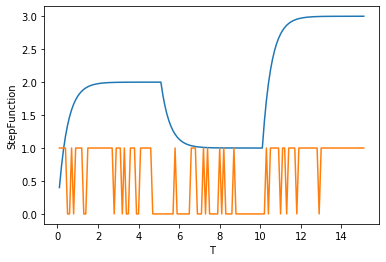

In [64]:
x1 = Tuple_converter(df1['Normalisedx'])
Stepfunction = train_weights_step(x1,0.01,10000)
stepfunction2 = SelectedEpoch(10000,Stepfunction)
df1['StepFunction'] = stepfunction2
t = sns.lineplot(x="T", y="X", data=df1)  #plot actual
t2 = sns.lineplot(x="T", y="StepFunction", data=df1) #plot predicted


## Sigmoid Function Perceptron

In [28]:
def sigmoid_activation(val): #declare sigmoid activation function
    sigmoid = 1/1+np.exp(-val) # Calculate sigmoid
    return sigmoid #return result

def train_weights_sigmoid(array, lr, Epochs2): #Method for sigmoid activation
    Weight = [-0.10,random.uniform(0,1),random.uniform(0,1),random.uniform(0,1)] # initialise 3 weights and 3 bias weights 
    for Epoch2 in range(Epochs2): #for each epoch
        sumerr = 0.0
        if (Epoch2 == 0  ):
            Output = [] #delcare the output array
            errorarr = []
            updated_weight = []
            count = 0 # Declare position 0 
            for x in array:# for each value in epoch array
                updated_weight.append([Weight[0],Weight[1],Weight[2],Weight[3]])
                prediction, netwrk_sum = predict3(x,Weight) # complete prediction on result
                if count == 0: # change target for weight
                    Target = x[2]
                elif count==1: # change target for weight
                    Target = x[1]
                else: #change target for weight
                    Target = x[0]
                delta = Target - prediction #Calculate delta
                error = delta # set error to delta
                errorarr.append(error)
                Output.append(prediction) # append prediction 
                Weight_change_bias= -x[0]*lr*error # calculate new bias weight
                Weight[0] = Weight[0] + Weight_change_bias # change the bias weight
                Weight_change= -x[0]*lr*error # calculate weight change 
                for i in range(len(x)):  # for each item in the tuple update weigt
                    Weight[i + 1] = Weight[i +1] + Weight_change #update weight
                sumerr +=error**2
                count = count + 1 # increment count
            print('>epoch=%d, lrate=%.3f, error=%.3f' % (Epoch2, lr, sumerr))
        else: 
            countweight = 0
            for x in array:# for each value in epoch array            
                prediction, netwrk_sum = predict3(x,updated_weight[countweight]) # complete prediction on result
                if count == 0: # change target for weight
                    Target = x[2]
                elif count==1: # change target for weight
                    Target = x[1]
                else: #change target for weight
                    Target = x[0]
                delta = Target - prediction #Calculate delta
                error = delta # set error to delta
                errorarr.append(error)
                Output.append(prediction) # append prediction 
                Weight_change_bias= -x[0]*lr*error # calculate new bias weight
                updated_weight[countweight][0] = updated_weight[countweight][0] + Weight_change_bias # change the bias weight
                Weight_change= -x[0]*lr*error # calculate weight change 
                for i in range(len(x)):  # for each item in the tuple update weigt
                    updated_weight[countweight][i+1] = updated_weight[countweight][i+1] + Weight_change #update weight
                countweight = countweight +1
                sumerr +=error**2
                count = count + 1 # increment count
            print('>epoch=%d, lrate=%.3f, error=%.3f' % (Epoch2, lr, sumerr))
    return Output,errorarr #return data


def predict3(noise2b,weights2):
    net_sum = 0
    net_sum = weights2[0]
    for i in range(len(noise2b)-1):
        net_sum += weights2[i + 1] * noise2b[i]
    activation2 = sigmoid_activation(net_sum)
    return activation2, net_sum

>epoch=0, lrate=0.010, error=114.653
>epoch=1, lrate=0.010, error=115.072
>epoch=2, lrate=0.010, error=111.603
>epoch=3, lrate=0.010, error=108.315
>epoch=4, lrate=0.010, error=105.189
>epoch=5, lrate=0.010, error=102.211
>epoch=6, lrate=0.010, error=99.372
>epoch=7, lrate=0.010, error=96.663
>epoch=8, lrate=0.010, error=94.077
>epoch=9, lrate=0.010, error=91.607


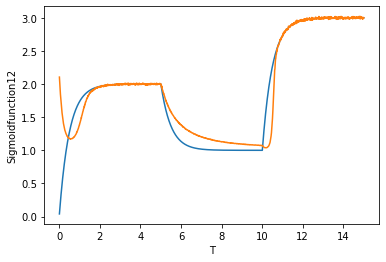

In [36]:
x12 = Tuple_converter(df1['xNoise'])
Sigmoidfunction2,tttt = train_weights_sigmoid(x12,0.01,10)
Sigmoidfunction3 = SelectedEpoch(10,Sigmoidfunction2)
df1['Sigmoidfunction12'] = Sigmoidfunction3
t = sns.lineplot(x="T", y="X", data=df1)  #plot actual
t2 = sns.lineplot(x="T", y="Sigmoidfunction12", data=df1) #plot predicted

## Learning Rates Sigmoid Perceptron

In [ ]:
xLR001 = Tuple_converter(df1['xNoise'])
SigmoidPerceptronLR001,ttt = train_weights_sigmoid(xLR001,0.01,1) #Train Perceptron using learning rate 0.01
df1['SigmoidPerceptronLR001'] = SigmoidPerceptronLR001 # add learning rate 0.01 to dataframe
Noiseplt = sns.lineplot(x="T", y="X", data=df1)  # plot actual
Stepplt = sns.lineplot(x="T", y="SigmoidPerceptronLR001", data=df1) #plot predicted 

In [ ]:
xLR01 = Tuple_converter(df1['xNoise'])
SigmoidPerceptronLR01,tttt = train_weights_sigmoid(xLR01,0.1,1) #Train Perceptron using learning rate 0.1
df1['SigmoidPerceptronLR01'] = SigmoidPerceptronLR01 # add learning rate 0.1 to dataframe
Noiseplt = sns.lineplot(x="T", y="X", data=df1)  # plot actual
Stepplt = sns.lineplot(x="T", y="SigmoidPerceptronLR01", data=df1) #plot predicted 

In [ ]:
xLR025 = Tuple_converter(df1['xNoise'])
SigmoidPerceptronLR025,ttttt = train_weights_sigmoid(xLR025,0.001,1) #Train Perceptron using learning rate 0.25
df1['SigmoidPerceptronLR0001'] = SigmoidPerceptronLR025 # add learning rate 0.25 to dataframe
Noiseplt = sns.lineplot(x="T", y="X", data=df1)  # plot actual
Stepplt = sns.lineplot(x="T", y="SigmoidPerceptronLR0001", data=df1) #plot predicted 